# ZIKV DMS analysis with mAb selections (ZKA64 and ZKA185)

Deep mutational scanning of Zika virus MR-766 (1947, Uganda) envelope (E) protein. ZKA64 and ZKA185 are human monoclonal antibodies (Absolute Antibody, Oxford, UK). Analysis by Caroline Kikawa. Experiments by Evans Lab (Sourisseau et al., 2019 JVI). 

In [1]:
# import tools
import os
import glob
import numpy
import pandas as pd

from Bio import SeqIO

import dms_tools2
from dms_tools2.ipython_utils import showPDF

In [2]:
# ID input/output directories
samplelist = './data/samplelist.csv'
datadir = './data/'
resultsdir = './results/'
os.makedirs(resultsdir, exist_ok=True)

In [3]:
# reference sequences
Erefseq = './data/E.fasta'
subamplicon_alignspecs = './data/subamplicon_alignspecs.txt'

In [4]:
# read in E protein sequence data 
refseq = SeqIO.read(Erefseq, 'fasta')
E_seq = refseq.seq
E_prot = E_seq.translate()

assert E_prot.count('*') == 0, 'protein seq contains unexpected stop codon(s)'

# Bio.SeqIO documention https://biopython.org/wiki/SeqIO

In [5]:
# read in sample list and add the sampleID 'name'
samples = (pd.read_csv(samplelist, index_col=False))
pd.set_option('display.max_colwidth', None)

samples.insert(0, 'name', (samples['library'] + '-' + samples['selection']))
samples.style.hide_index()

name,library,selection,antibody,percent_infectivity,R1,SRA_accession
Lib1-plasmid,Lib1,plasmid,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/170609_SN367_0933_BHMLH5BCXY_lane2/Unaligned/Project_bloom_lab/Sample_zikv-1/*R1*.fastq.gz,SRR8878405
Lib2-plasmid,Lib2,plasmid,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/170609_SN367_0933_BHMLH5BCXY_lane2/Unaligned/Project_bloom_lab/Sample_zikv-2/*R1*.fastq.gz,SRR8878404
Lib3-plasmid,Lib3,plasmid,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/170609_SN367_0933_BHMLH5BCXY_lane2/Unaligned/Project_bloom_lab/Sample_zikv-3/*R1*.fastq.gz,SRR8878399
wildtype-plasmid,wildtype,plasmid,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/170609_SN367_0933_BHMLH5BCXY_lane2/Unaligned/Project_bloom_lab/Sample_zikv-wt/*R1*.fastq.gz,SRR8878396
Lib1-virus,Lib1,virus,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/180427_SN367_1155_BHHJMKBCX2/Unaligned/Project_bloom_lab/Sample_zikv_L1/*R1*.fastq.gz,SRR8878397
Lib2-virus,Lib2,virus,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/180427_SN367_1155_BHHJMKBCX2/Unaligned/Project_bloom_lab/Sample_zikv_L2/*R1*.fastq.gz,SRR8878395
Lib3-virus,Lib3,virus,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/180427_SN367_1155_BHHJMKBCX2/Unaligned/Project_bloom_lab/Sample_zikv_L3/*R1*.fastq.gz,SRR8878409
wildtype-virus,wildtype,virus,none,nan,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/180427_SN367_1155_BHHJMKBCX2/Unaligned/Project_bloom_lab/Sample_zikv_WT/*R1*.fastq.gz,SRR8878408
Lib1-no-antibody,Lib1,no-antibody,no-antibody,71.060000,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/180928_D00300_0621_BHMJGNBCX2/Unaligned/Project_bloom_lab/Sample_Mock_Lib1_*/*R1*.fastq.gz,SRR8878411
Lib2-no-antibody,Lib2,no-antibody,no-antibody,132.770000,/fh/fast/bloom_j/SR/ngs/illumina/bloom_lab/180928_D00300_0621_BHMJGNBCX2/Unaligned/Project_bloom_lab/Sample_Mock_Lib2_*/*R1*.fastq.gz,SRR8878398


In [6]:
# read in align specs
with open (subamplicon_alignspecs, 'r') as file:
    alignspecs = file.read().replace('\n','')
alignspecs

'1,303,33,38 304,609,38,40 610,903,41,36 904,1200,41,37 1201,1512,36,35'

In [14]:
# process deep sequencing data: run dms2_batch_subamp

# make folder where codon counts will go
codons_batch_subamp = os.path.join(resultsdir + 'codoncounts')
os.makedirs(codons_batch_subamp, exist_ok=True)

# tell me if sample path is missing
for c in samples['R1']:
    if c == 'NaN':
       raise ValueError('samples is missing a file path')

# create df and export csv with only name/R1 for dms2_batch_subamp   
batchfile = os.path.join(datadir + 'batchSubampIDs.csv')
samples[['name','R1']].to_csv(batchfile, index=False)

#use existing data
use_existing = 'yes'

# standard trim in Bloom lab analyses is 200 bp
# from documentation: "removes low-quality nucleotides that tend to be at the end of long reads"
R1TRIM = 200
R2TRIM = 200

#needs a name to run
baka = ! dms2_batch_bcsubamp \
    --batchfile {batchfile} \
    --refseq {Erefseq} \
    --alignspecs {alignspecs} \
    --outdir {codons_batch_subamp} \
    --summaryprefix summary \
    --R1trim 200 \
    --R2trim 200 \
    --ncpus 16 \
    --use_existing {use_existing}

# ! executes following code in the command line

# add column to df.samples that includes filepath to each codoncounts.csv
samples['codoncounts'] = codons_batch_subamp + '/' + samples['name'] + '_codoncounts.csv'

# tell me how you did
print(f'dms2_batch_bcsubamp {dms_tools2.__version__} aligned sequencing data and created codon count files in {codons_batch_subamp}')

dms2_batch_bcsubamp 2.6.10 aligned sequencing data and created codon count files in ./results/codoncounts


# Potential issue?
Above cell is failing, raising errors for each PDF generation step with the the following message:
    
    2021-08-31 14:02:36,810 - ERROR - Terminating dms2_batch_bcsubamp with ERROR
    Traceback (most recent call last):
      File "/home/ckikawa/.conda/envs/ZIKV_DMS/bin/dms2_batch_bcsubamp", line 179, in main
        dms_tools2.plot.plotCodonMutTypes(batchruns['name'],
      File "/home/ckikawa/.conda/envs/ZIKV_DMS/lib/python3.8/site-packages/dms_tools2/plot.py", line 498, in plotCodonMutTypes
        df = (counts[list(muttypes.values()) + ['ncounts', 'name']]
    TypeError: sum() got an unexpected keyword argument 'axis'

This error is raised 6 times (same message each time). The first 5 PDFs that were generated are subsequently deleted and the run is cancelled.

In [11]:
# show results inline 
# from IPython.display import IFrame, display
# filepath = "file.pdf"
# IFrame(filepath, width=700, height=400)

# Bloom notebook method
# from dms_tools2.ipython_utils import showPDF
# showPDF(filename or [list of filenames])

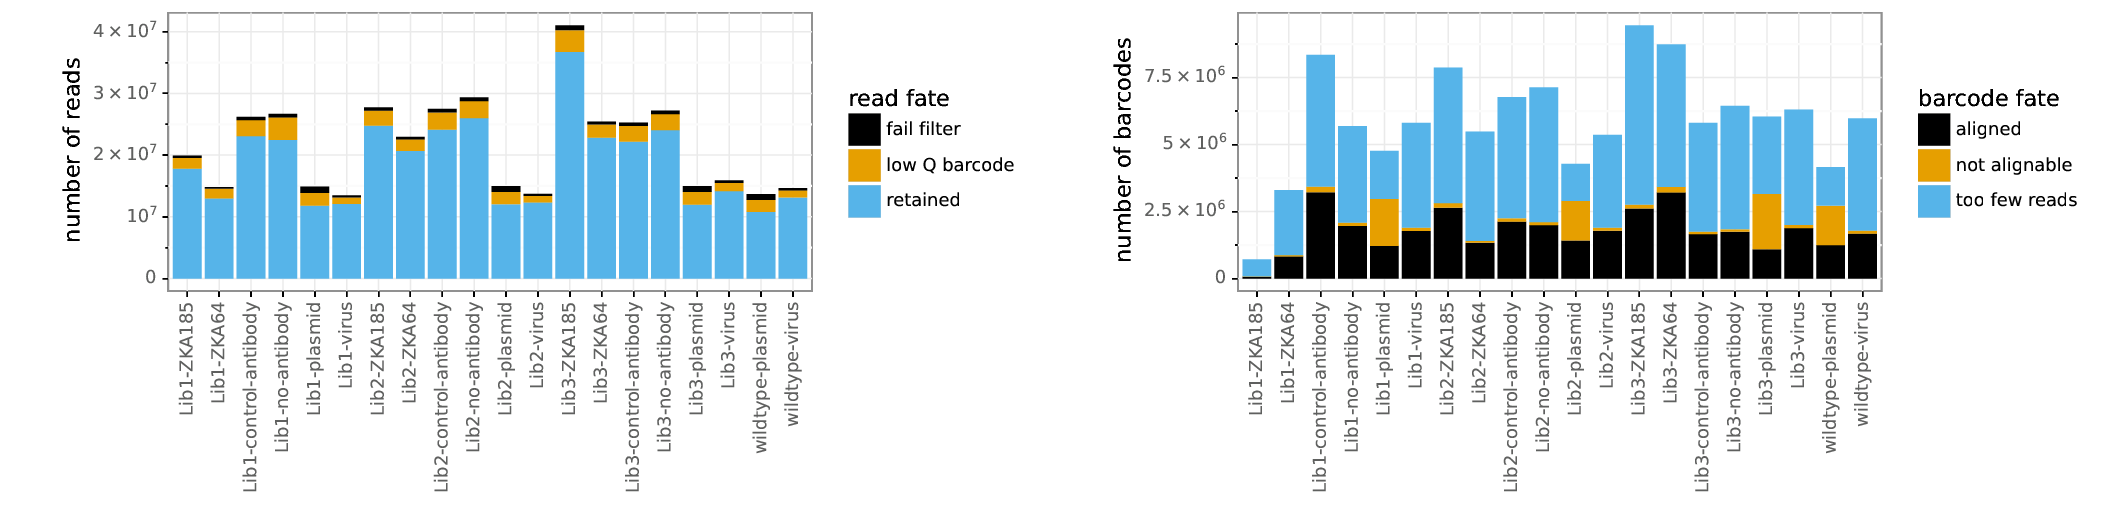

In [24]:
showPDF([os.path.join(codons_batch_subamp + "/summary_" + "readstats.pdf"),
         os.path.join(codons_batch_subamp + "/summary_" + "bcstats.pdf")])

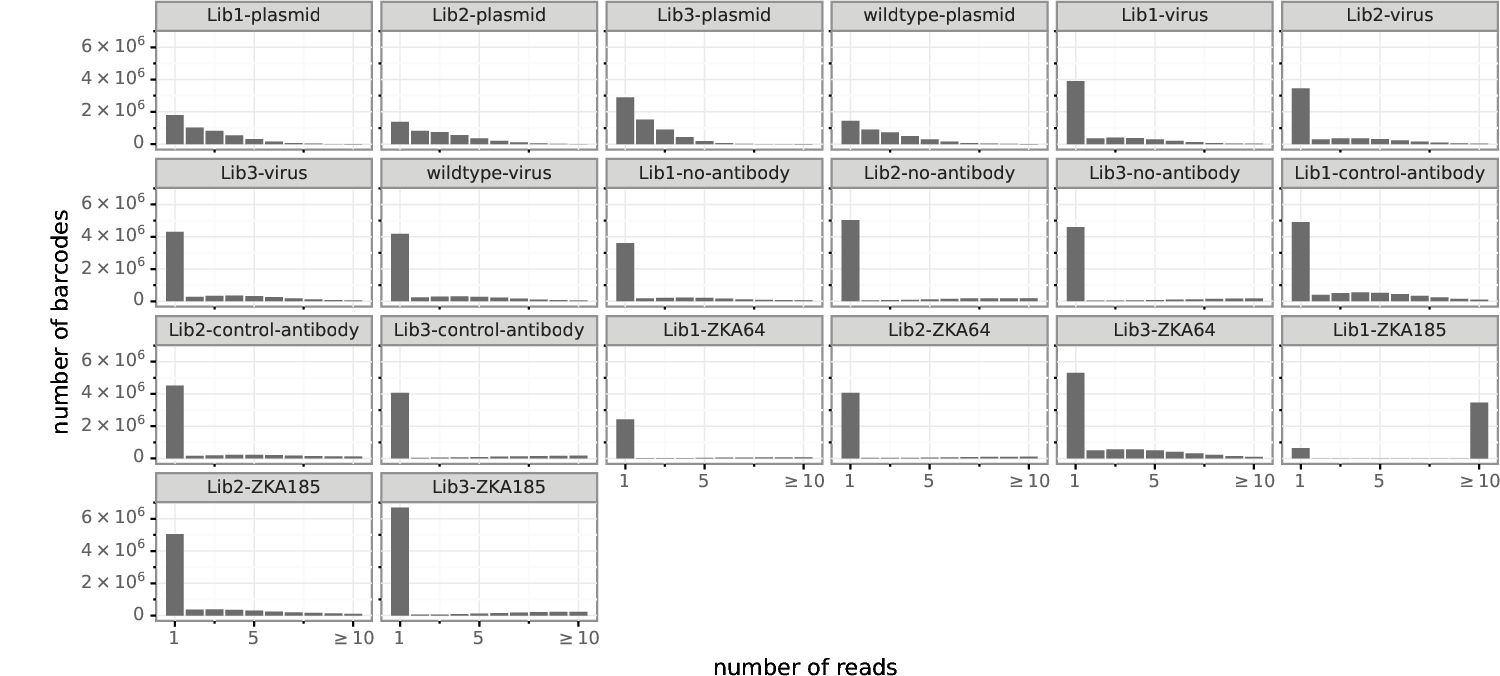

In [25]:
showPDF(os.path.join(codons_batch_subamp + "/summary_" + "readsperbc.pdf"))

In [6]:
#dms_batch_prefs

In [ ]:
# dms_batch_diffsel